# Building with AI Agents

## What is an AI Agent?
An **AI agent** is a system that perceives its environment, processes information, and takes actions to achieve specific goals. AI agents use algorithms, models, and decision-making frameworks to interact with their surroundings intelligently.

This is different from applications such as ChatGPT which are not able to fulfil the "do action" criteria of AI Agents, for example, load a website and schedule posts. Note, LLMs are the "brains" for AI Agents, better LLMs will provide agents with better reasoning, long-term memory, multimodality, etc.

## Key Components of an AI Agent
1. **Perception**: Gathers data from the environment using sensors, APIs, or databases.
2. **Processing & Reasoning**: Uses machine learning models, logic-based algorithms, or heuristics to analyze data and make decisions.
3. **Action**: Executes tasks based on the analysis, interacting with the environment.
4. **Learning**: Adapts based on past experiences, using reinforcement learning, supervised learning, or unsupervised learning.

## Types of AI Agents
1. **Reactive Agents**: Respond to stimuli without storing past experiences (e.g., chess-playing AI).
2. **Model-Based Agents**: Maintain internal representations of the environment to predict future states.
3. **Goal-Based Agents**: Take actions that lead to predefined objectives.
4. **Utility-Based Agents**: Optimize decisions based on a utility function for best outcomes.
5. **Learning Agents**: Continuously improve by learning from interactions with the environment.

## Applications of AI Agents
- **Autonomous Vehicles**: AI agents process sensor data to make driving decisions.
- **Chatbots & Virtual Assistants**: Agents like ChatGPT interact with users and provide responses.
- **Game AI**: Non-player characters (NPCs) use AI agents to behave intelligently in games.
- **Financial Trading**: AI agents analyze market data to make automated trades.
- **Healthcare**: AI-powered diagnostics and personalized medicine.

## AI Agent Frameworks
- Most popular:
    - AutoGPT (first widely adopted agent framework)
    - BabyAGI
    - CrewAI
    - AutoGen
    - MultiOn
    - ChatDev
    - MetaGPT
- CrewAI
    - Perfect for begineers
    - No complex setup
    - Detailed documentation, fully open-sourced with the developers constantly providing updates

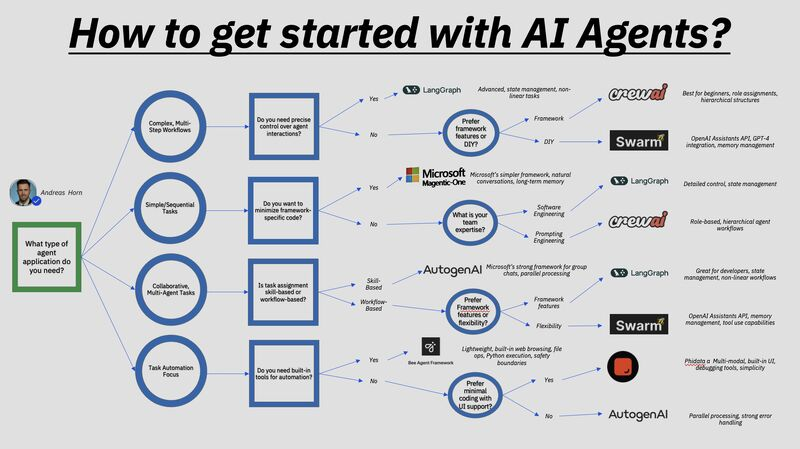

# AI Agents with CrewAI

First, we install the required libraries.

In [1]:
!pip install -q crewai crewai-tools langchain langchain_community python-dotenv

Import the required libraries

In [2]:
import os

from crewai import Agent, Task, Crew, Process
from crewai_tools import SerperDevTool

from langchain_openai import ChatOpenAI

from dotenv import load_dotenv

Import the API Keys

In [3]:
# Load environment variables from the .env file (if present)
load_dotenv()

# Access environment variables as if they came from the actual environment
OPENAI_API_KEY = os.getenv('OPENAI_API_KEY')
SERPER_API_KEY = os.getenv('SERPER_API_KEY')

Load Serper search tool and create agent.

 Serper is a low-cost Google Search API that can be used to add answer box, knowledge graph, and organic results data from Google Search.

In [4]:
search_tool = SerperDevTool()

`allow_delegation` this is one of the key differenciators of the CrewAI framework. It allows you to disable deligations for the agent as a Researcher should be doing the research instead of deligating to another agent. 

`tool` gives the agent access to all the different tools such as the search tool. This is the key differenciator with using something such as ChatGPT.

In [7]:
researcher = Agent (
    role = 'Senior Research Assistant',
    goal = 'Look up the latest Advancements in AI Agents',
    backstory = """You work at a leading tech think tank. Your expertise lies in searching Google for AI Agent frameworks.
                    You have a knack for dissecting complex data and presenting actionable insights.""",
    verbose=True,
    allow_delegation=False,
    tools=[search_tool],
    llm=ChatOpenAI(model_name="gpt-4-turbo-preview", temperature=0.2)
)

Initialize a writer agent that is able to carry out delegation and respond with more creative content. We enable delgation so that it is able to interact with the researcher agent to retreive new information. 

In [9]:
writer = Agent (
    role='Professional Short-Article Write', 
    goal = 'summarize the latest advancement in AI agents in a concise article',
    backstory = """You are a renowned content strategist, known for your insightful and engaging articles.
                    You transform complex concepts into compelling narratives.""",
    verbose=True,
    allow_delegation=True,
    llm=ChatOpenAI(model_name='gpt-4-turbo-preview', temperature=0.7)
)

Create the tasks for the agents.

In [10]:
# Create tasks for your agents
task1 = Task(
  description="""Conduct a comprehensive analysis of the latest advancements in AI Agents in November of 2024 to January of 2025.
  Identify key trends, breakthrough technologies, and potential industry impacts.""",
  expected_output="Full analysis report in bullet points",
  agent=researcher
)

task2 = Task(
  description="""Using the insights provided, write a short article
  that highlights the most significant AI Agent advancements.
  Your post should be informative yet accessible, catering to a tech-savvy audience.
  Make it sound cool, avoid complex words so it doesn't sound like AI.""",
  expected_output="Full blog post of at least 3 paragraphs",
  agent=writer
)

Create the Crew instance which will execute the tasks with the specifed agents. 

In [13]:
# Instantiate your crew with a sequential process
crew = Crew(
    agents = [researcher, writer],
    tasks = [task1, task2],
    verbose = True
)

2025-02-01 09:51:45,846 - 38988 - __init__.py-__init__:537 - WARNING: Overriding of current TracerProvider is not allowed


Run the full process

In [14]:
result = crew.kickoff()

print("##############")
print(result)

# Agent: Senior Research Assistant
## Task: Conduct a comprehensive analysis of the latest advancements in AI Agents in March of 2024.
  Identify key trends, breakthrough technologies, and potential industry impacts.


# Agent: Senior Research Assistant
## Using tool: Search the internet with Serper
## Tool Input: 
"{\"search_query\": \"latest advancements in AI Agents March 2024\"}"
## Tool Output: 
{'searchParameters': {'q': 'latest advancements in AI Agents March 2024', 'type': 'search', 'num': 10, 'engine': 'google'}, 'organic': [{'title': '2024: A year of extraordinary progress and advancement in AI', 'link': 'https://blog.google/technology/ai/2024-ai-extraordinary-progress-advancement/', 'snippet': "This article summarizes Google's AI advancements in 2024, highlighting their commitment to responsible development. Google released Gemini 2.0, ...", 'position': 1}, {'title': '2024: The year AI agents transformed from chatbots to ... - eMarketer', 'link': 'https://www.emarketer.com/c

# Conclusion

To conclude, we have demonstrated a simple AI Agent based workflow, leveraging CrewAI as the orchestration Framework. Here, we created 2 agents. 1 to act as a researcher and another to act as a writer to summarize content. The actions of both are orchestrated by the CrewAI Framework.